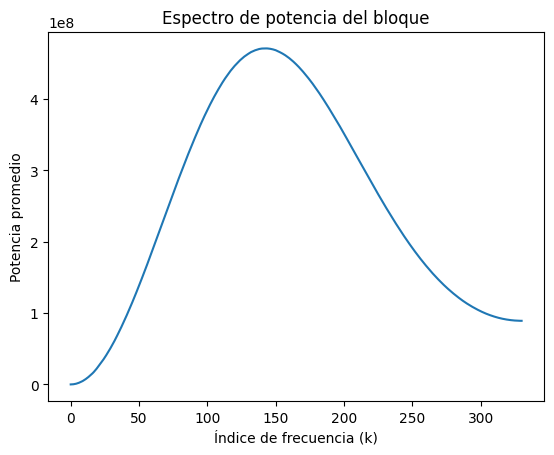

In [ ]:
import numpy as np
from scipy.sparse import load_npz
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Cargar la matriz
W = load_npz("W_compressible_gamma1.354_Mach1.7.npz")
print(f"Dimensiones de W: {W.shape}")
print(f"Elementos no cero: {W.count_nonzero()}")

In [ ]:
plt.figure(figsize=(10, 8))

# Convertir a formato COO para visualización eficiente
W_coo = W.tocoo()

# Gráfico de dispersión de elementos no cero
plt.scatter(W_coo.col, W_coo.row, c=W_coo.data, s=1, cmap='viridis', alpha=0.6)
plt.colorbar(label='Valor del peso')
plt.title("Estructura de la Matriz W (Patrón Diagonal)")
plt.xlabel("Índice de columna")
plt.ylabel("Índice de fila")
plt.gca().invert_yaxis()  # Para orientación correcta

plt.tight_layout()
plt.show()

In [ ]:
# Extraer la diagonal
diagonal = W.diagonal()

# Número de puntos espaciales
n_points = len(diagonal) // 4

# Separar por variable
weights = {
    'Densidad (ρ)': diagonal[0::4],
    'Velocidad X': diagonal[1::4],
    'Velocidad Y': diagonal[2::4],
    'Temperatura (T)': diagonal[3::4]
}

# Gráfico de distribución de pesos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distribución de Pesos por Variable", y=1.02)

for ax, (name, values) in zip(axes.flatten(), weights.items()):
    ax.hist(values, bins=50, log=True, color='skyblue', edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel("Valor del peso")
    ax.set_ylabel("Frecuencia (log)")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Asumiendo que conoces las dimensiones espaciales (nx, ny)
nx, ny = 1200, 800  # Ajustar según tu caso

# Reconstruir mapas espaciales para cada variable
rho_weights = weights['Densidad (ρ)'].reshape(nx, ny)
temp_weights = weights['Temperatura (T)'].reshape(nx, ny)

# Visualización con mapa de calor
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

im1 = ax1.imshow(rho_weights.T, origin='lower', cmap='plasma', norm=LogNorm())
plt.colorbar(im1, ax=ax1, label='Peso')
ax1.set_title("Pesos para Densidad (T̄/(γρ̄M²))")

im2 = ax2.imshow(temp_weights.T, origin='lower', cmap='viridis', norm=LogNorm())
plt.colorbar(im2, ax=ax2, label='Peso')
ax2.set_title("Pesos para Temperatura (ρ̄/(γ(γ-1)T̄M²))")

plt.tight_layout()
plt.show()

In [ ]:
# Extraer un segmento representativo
segment_size = 40  # Muestra 10 puntos (4 variables cada uno)
segment = diagonal[:segment_size]

# Crear etiquetas
labels = []
for i in range(segment_size//4):
    labels += [f'ρ_{i}', f'vx_{i}', f'vy_{i}', f'T_{i}']

plt.figure(figsize=(12, 6))
plt.bar(labels[:segment_size], segment, color='teal')
plt.xticks(rotation=45, ha='right')
plt.title("Primeros elementos de la diagonal de W")
plt.ylabel("Valor del peso")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Crear grid espacial
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)

# Visualización 3D para densidad
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, rho_weights.T, cmap='viridis', 
                      linewidth=0, antialiased=False, alpha=0.7)
fig.colorbar(surf, ax=ax, shrink=0.5, label='Peso densidad')
ax.set_title("Distribución espacial de pesos para densidad")
ax.set_xlabel("Dirección X")
ax.set_ylabel("Dirección Y")
plt.show()